## Sample for DecisionTree Regressor

In [29]:
# Import the necessary modules and libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split

In [ ]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16)) ## noise

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 1) (27, 1) (53,) (27,)


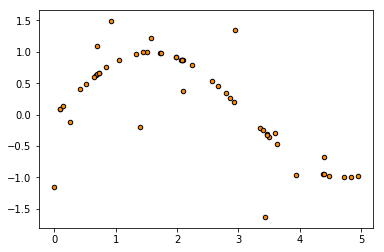

In [25]:
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.show()

In [26]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
# Predict
# X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (500, 1) and (27,)

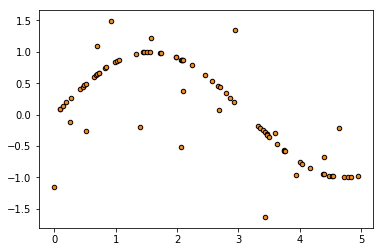

In [20]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")

plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [30]:
mean_squared_error(y_test,y_1) ## y1 is better
mean_squared_error(y_test,y_2)


0.17102516305981008

0.21190290074813709

In [31]:
r2_score(y_test,y_1) ## y1 is better
r2_score(y_test,y_2)

0.5935248160351929

0.4963707736144466

In [32]:
explained_variance_score(y_test,y_1) ## y1 is better
explained_variance_score(y_test,y_2)

0.5972381824830901

0.4972290356677773

In [43]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [44]:
dot_data = StringIO()

In [45]:
export_graphviz(regr_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [46]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [52]:
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: Warning: Could not load "/mnt/c/Users/fredcorpuz06/miniconda3/envs/kaggle/lib/graphviz/libgvplugin_pango.so.6" - file not found
Warning: Could not load "/mnt/c/Users/fredcorpuz06/miniconda3/envs/kaggle/lib/graphviz/libgvplugin_pango.so.6" - file not found
Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pdf pic plain plain-ext png pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4 xdot_json


In [50]:
export_graphviz(regr_1, out_file='tree.dot') 